### Individual Homework

#### Enter your name here: Lai Khanh Nam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [2]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [3]:
movies["genre"].value_counts()

genre
Comedy         848
Action         738
Drama          498
Adventure      288
Crime          202
Biography      135
Horror         131
Animation       35
Fantasy         28
Documentary     25
Mystery         16
Sci-Fi           7
Family           3
Musical          2
Romance          2
Western          2
Thriller         1
Name: count, dtype: int64

**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [4]:

table1 = (
    movies
    .groupby('genre')
    .agg(
        avg_gross=('gross', 'mean'),
        avg_budget=('budget', 'mean')
    )
    .assign(return_on_budget = lambda df: df['avg_gross'] / df['avg_budget'])
    .sort_values('return_on_budget', ascending=False)
)

table1


,avg_gross,avg_budget,return_on_budget
genre,,,
Musical,9.208400e+07,3.189500e+06,28.870983
Family,1.491605e+08,1.483333e+07,10.055763
Western,2.082188e+07,3.465000e+06,6.009202
Documentary,1.735397e+07,5.887852e+06,2.947420
Horror,3.771374e+07,1.350492e+07,2.792593
Fantasy,4.240884e+07,1.758214e+07,2.412040
Comedy,4.263055e+07,2.444632e+07,1.743843
Mystery,6.753302e+07,3.921875e+07,1.721958
Animation,9.843379e+07,6.170143e+07,1.595324


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [5]:
table2 = (
    movies
    .groupby('director')
    .agg(
        total_gross=('gross', 'sum'),
        mean_gross=('gross', 'mean'),
        median_gross=('gross', 'median'),
        std_gross = ('gross', 'std')
    )
    
    .sort_values('total_gross', ascending=False)
    .head(15)
    
)

table2

,total_gross,mean_gross,median_gross,std_gross
director,,,,
Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

In [6]:
table3 = (
    movies
    .groupby('genre')
    .agg(
        rating_mean=('rating', 'mean'),
        rating_median=('rating', 'median'),
        rating_std=('rating', 'std'),
        rating_min=('rating', 'min'),
        rating_max=('rating', 'max')
    )
)


table3

,rating_mean,rating_median,rating_std,rating_min,rating_max
genre,,,,,
Action,6.232249,6.30,1.030362,2.1,9.0
Adventure,6.506597,6.60,1.093881,2.3,8.6
Animation,6.651429,6.90,0.968131,4.5,8.0
Biography,7.114074,7.20,0.759827,4.5,8.9
Comedy,6.109670,6.20,1.023075,1.9,8.8
Crime,6.915347,6.90,0.849356,4.8,9.3
Documentary,6.660000,7.40,1.766588,1.6,8.5
Drama,6.731526,6.80,0.916993,2.1,8.8
Family,6.500000,5.90,1.216553,5.7,7.9


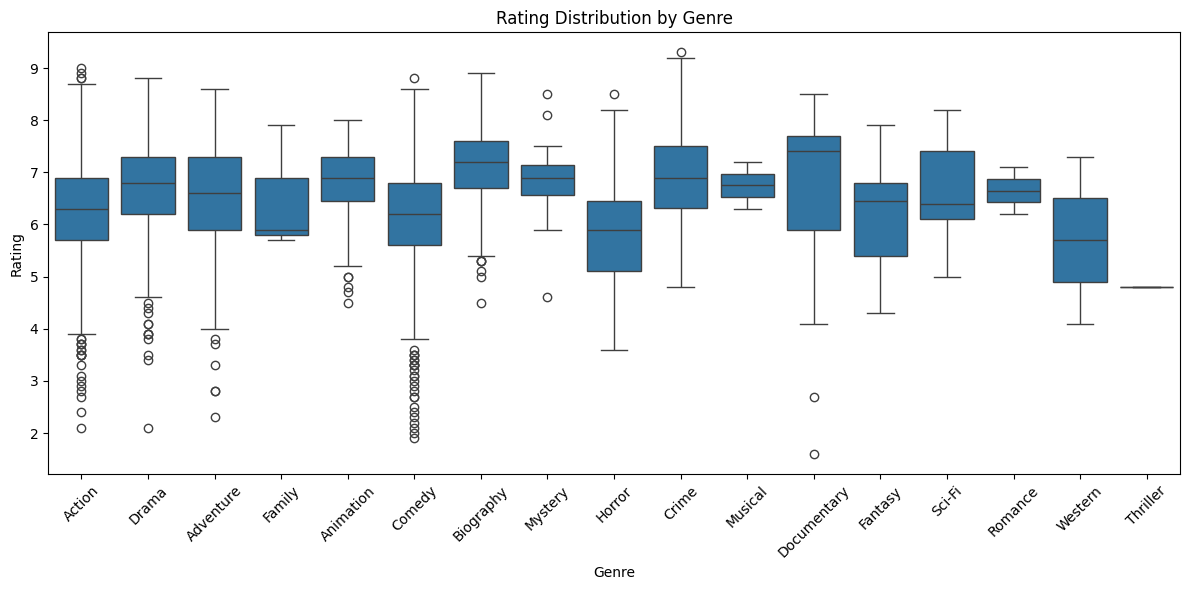

In [7]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=movies, x='genre', y='rating')

plt.title('Rating Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate genre labels for readability
plt.tight_layout()
plt.show()




**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [8]:
table4 = (
    movies
    .groupby('director')
    .agg(
        movie_count=('director', 'count'),
        duration_mean=('duration', 'mean'),
        
    )
    .sort_values('duration_mean', ascending=False)
    
)

table4

#I want to see the directors and their movie durations

,movie_count,duration_mean
director,,
Michael Cimino,1,325.0
Ron Maxwell,2,275.5
George Stevens,1,225.0
Michael Wadleigh,1,215.0
David Lean,1,200.0
...,...,...
Robin Budd,1,72.0
Steve Trenbirth,1,72.0
Frank Nissen,1,68.0


#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

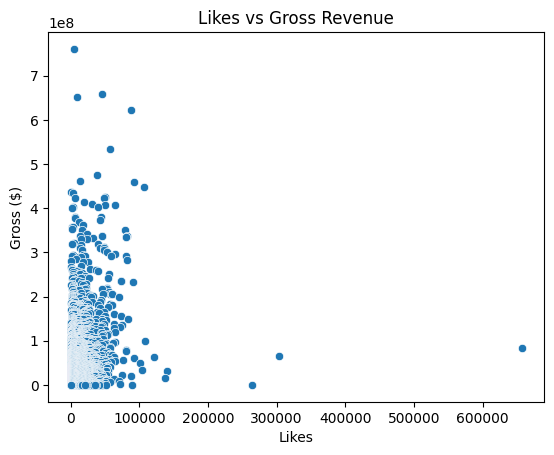

In [ ]:
sns.scatterplot(data=movies, x='cast_facebook_likes', y='gross')
plt.title('Likes vs Gross Revenue')
plt.xlabel('Likes')
plt.ylabel('Gross ($)')
plt.show()

#I do not think its a good predictor for gross revenue. There are many outliers and the correlation is not clear. I map the predictor to x axis and the response to y axis.


**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

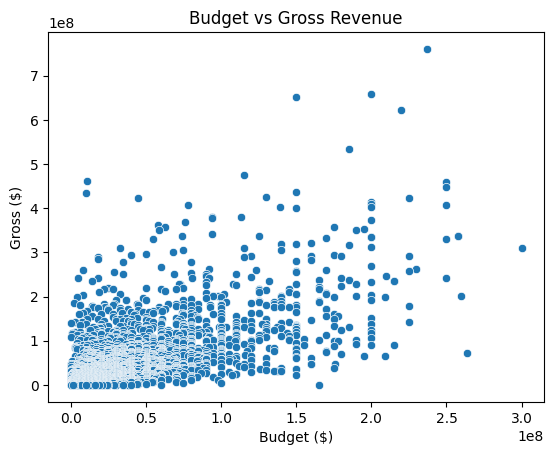

In [ ]:
sns.scatterplot(data=movies, x='budget', y='gross')
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross ($)')
plt.show()

#I think its a better predictor for gross revenue. 

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

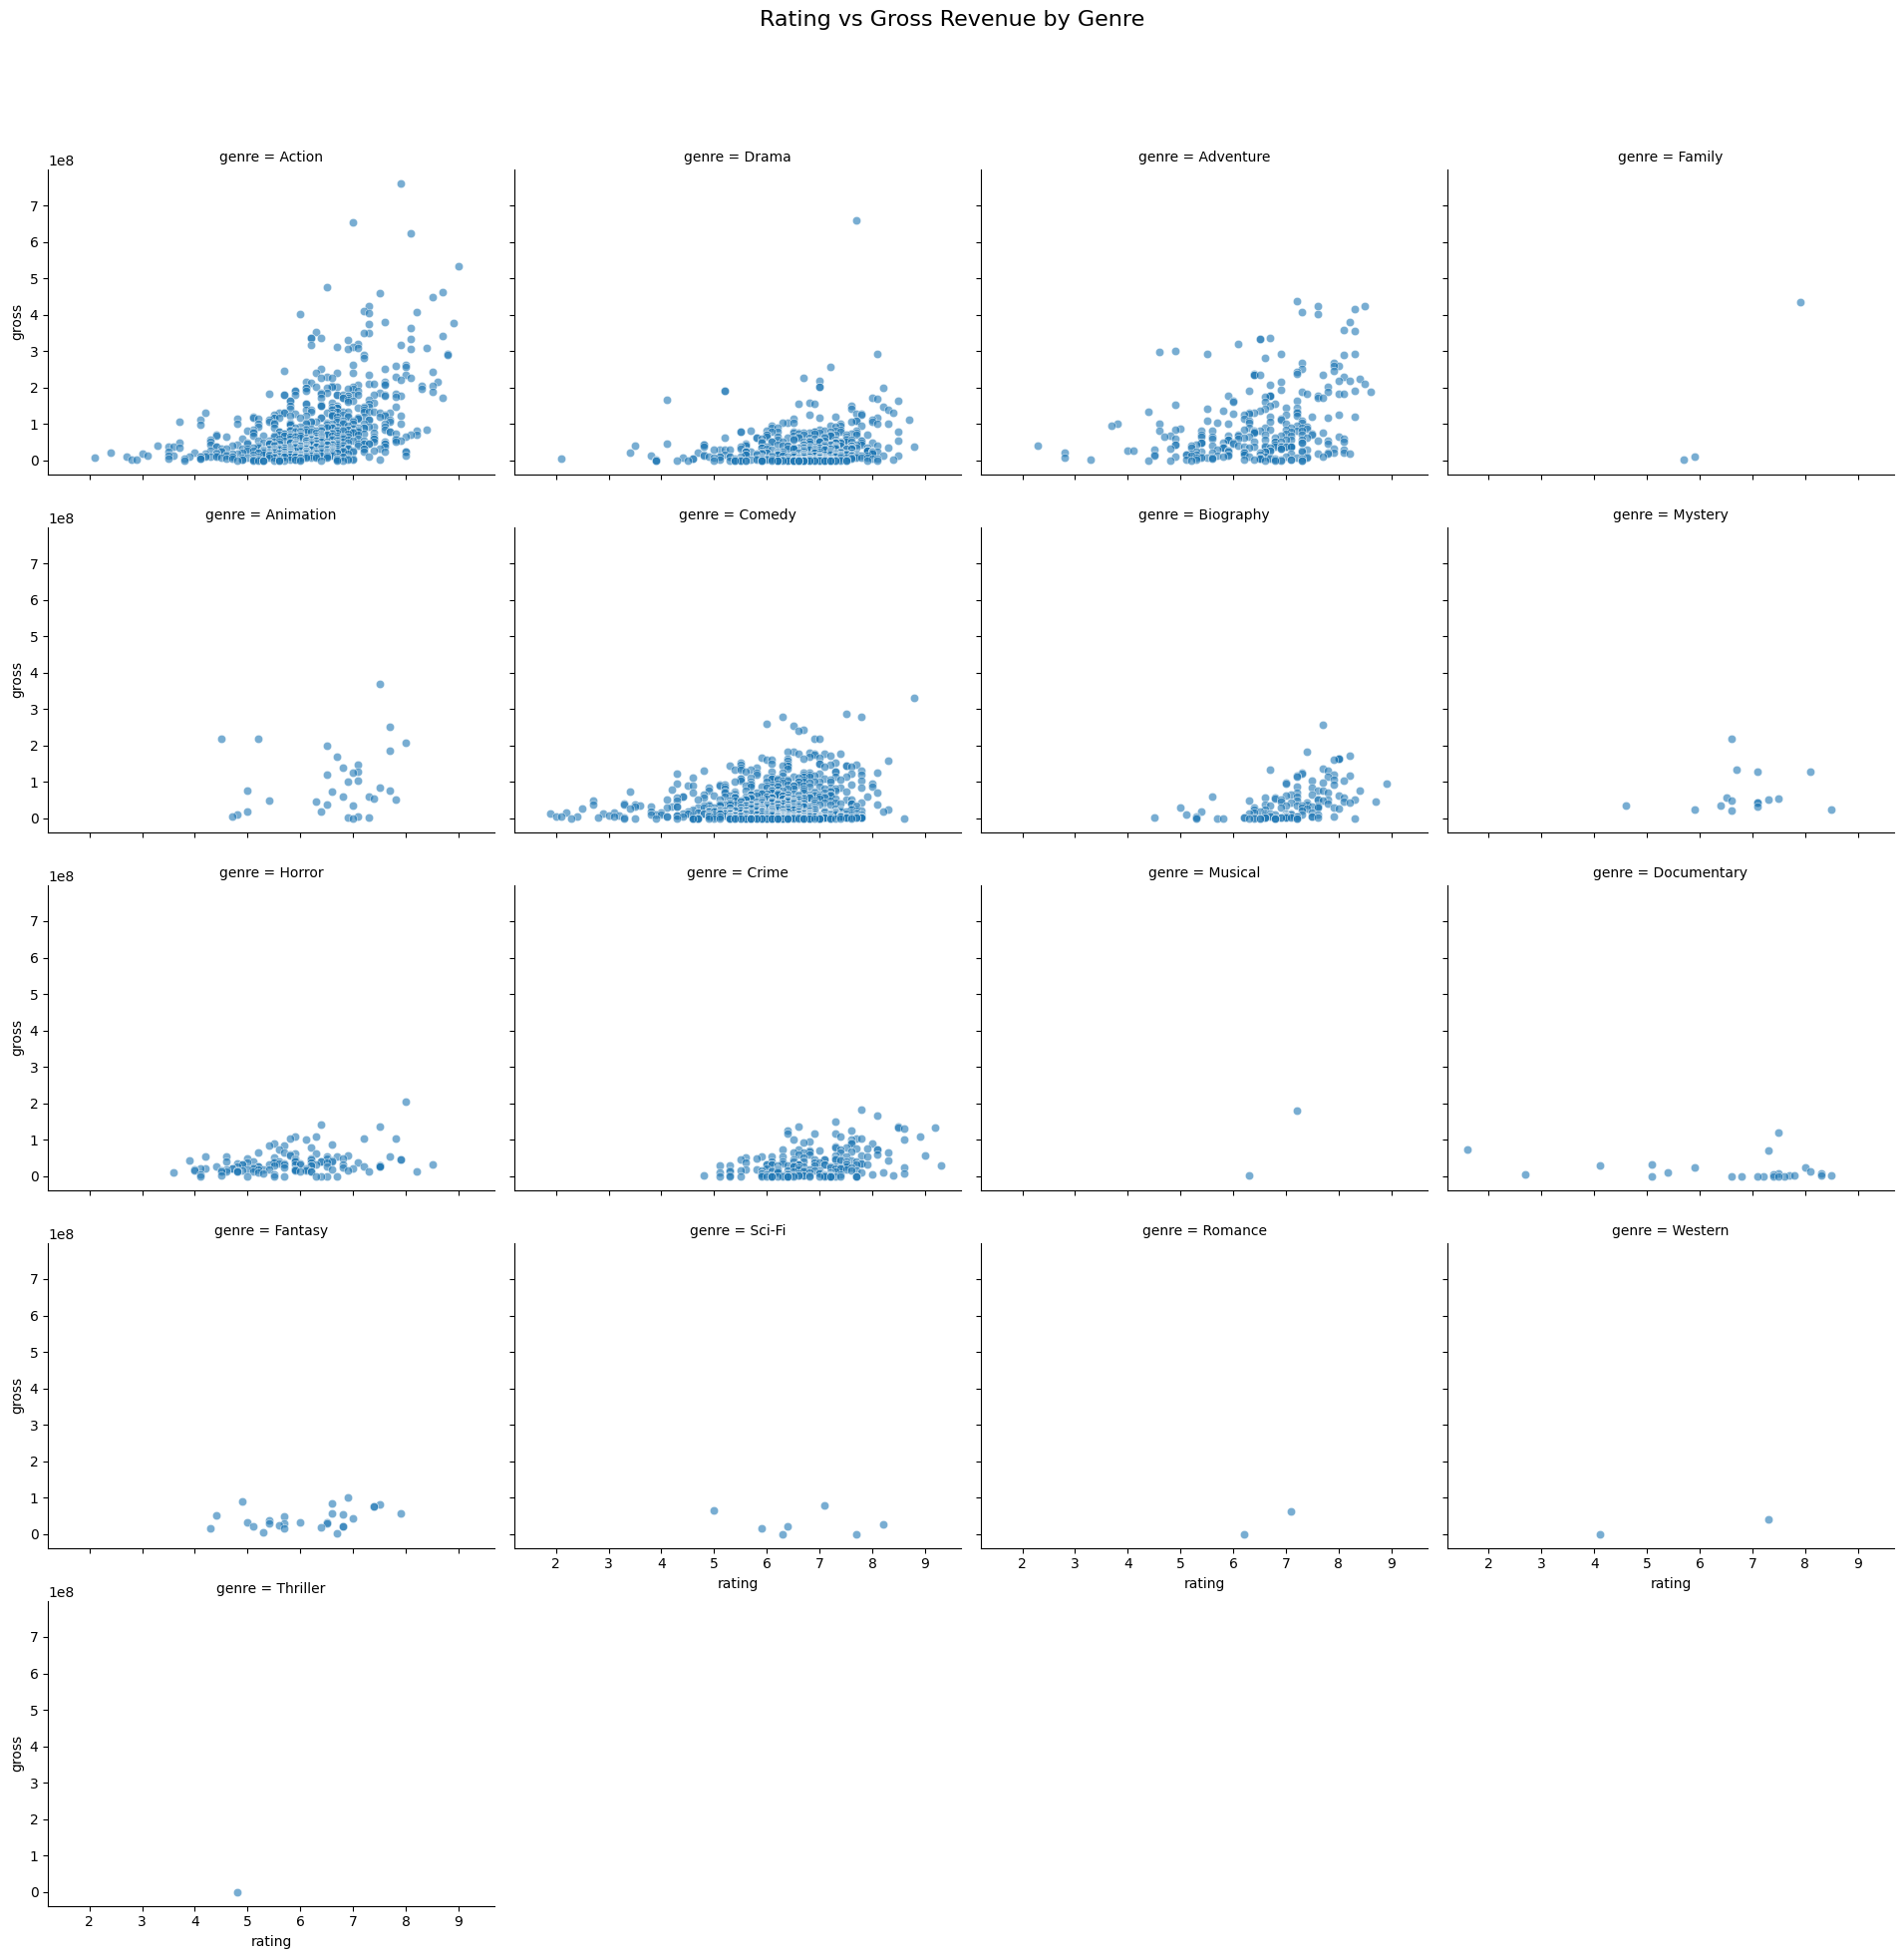

In [ ]:

sns.relplot(
    data=movies,
    x='rating',
    y='gross',
    col='genre',         
    col_wrap=4,          
    height=4,            
    aspect=1.2,          
    kind='scatter',      
    alpha=0.6            
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Rating vs Gross Revenue by Genre', fontsize=16)
plt.show()

# I dont think it is a good predictor. It seems like people like to rate some genres over others?


**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

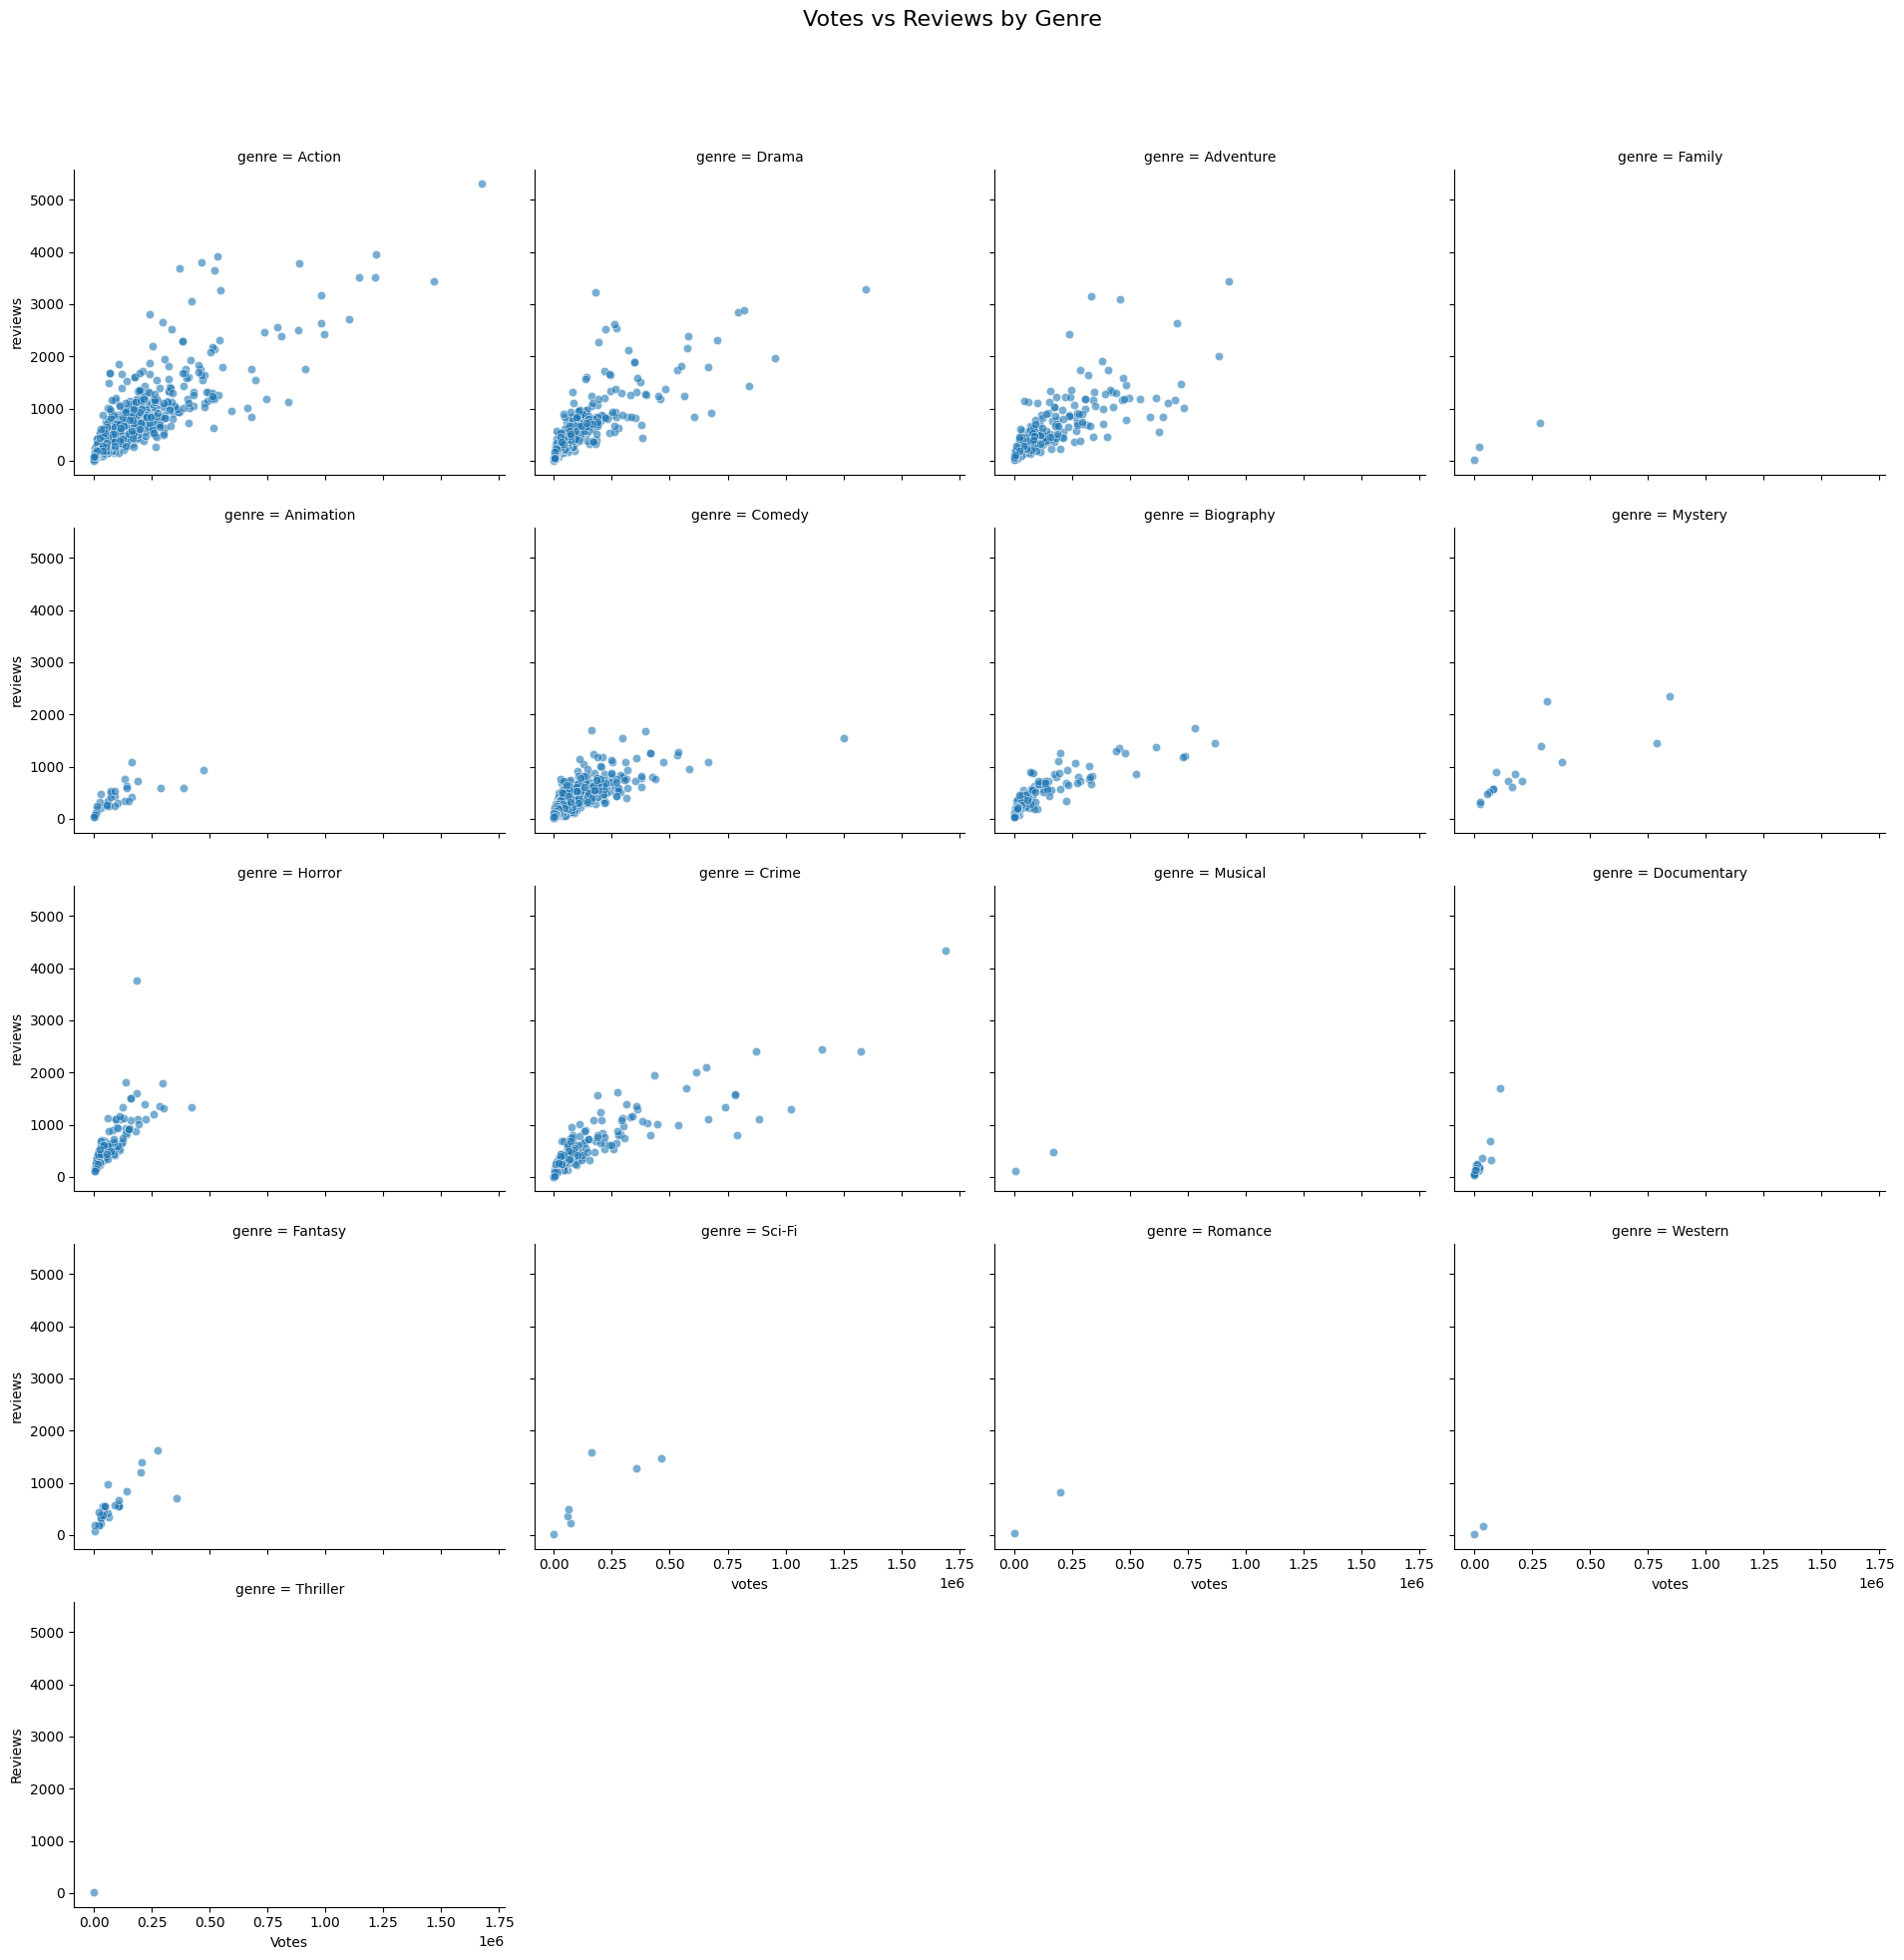

In [ ]:
sns.relplot(
    data=movies,
    x='votes',
    y='reviews',
    col='genre',         
    col_wrap=4,          
    height=4,            
    aspect=1.2,          
    kind='scatter',      
    alpha=0.6            
)

plt.subplots_adjust(top=0.9)
plt.suptitle('Votes vs Reviews by Genre', fontsize=16)
plt.xlabel('Votes')
plt.ylabel('Reviews')
plt.show()


### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.